In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import scipy.stats as stats

from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


In [2]:
data = pd.read_csv('combined_data_15-03.csv', sep=";", header=0)
#data = data.fillna(0)
data = data.dropna()
basedf = data

#removed errors
basedf = basedf.loc[basedf["Warning_code"] == 0]
data = data.loc[data["Warning_code"] == 0]
#data

In [3]:
data = data.drop(labels=["App_time","Left/Right"], axis=1)
data = data.astype('int')
data["App_time"] = basedf["App_time"]
data["Left/Right"] = basedf["Left/Right"]

In [4]:
data1 = data.loc[data["session"] == 1]
data1L = data.loc[data["Left/Right"] == "L"]
data1R = data.loc[data["Left/Right"] == "R"]

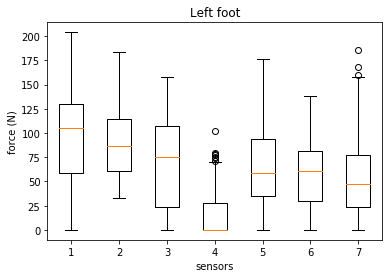

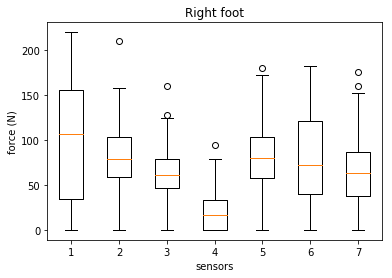

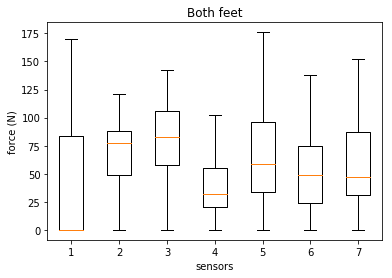

In [5]:
plt.boxplot([data1L["S0_force"],data1L["S1_force"],data1L["S2_force"],data1L["S3_force"],data1L["S4_force"],data1L["S5_force"],data1L["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_force"],data1R["S1_force"],data1R["S2_force"],data1R["S3_force"],data1R["S4_force"],data1R["S5_force"],data1R["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

plt.boxplot([data1["S0_force"],data1["S1_force"],data1["S2_force"],data1["S3_force"],data1["S4_force"],data1["S5_force"],data1["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Both feet')
plt.show()

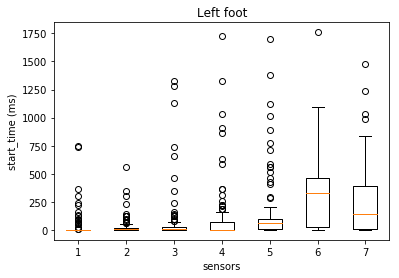

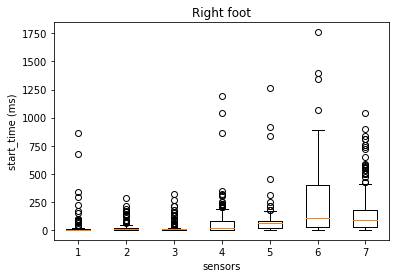

In [6]:
plt.boxplot([data1L["S0_start_time"],data1L["S1_start_time"],data1L["S2_start_time"],data1L["S3_start_time"],data1L["S4_start_time"],data1L["S5_start_time"],data1L["S6_start_time"]])
plt.ylabel('start_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_start_time"],data1R["S1_start_time"],data1R["S2_start_time"],data1R["S3_start_time"],data1R["S4_start_time"],data1R["S5_start_time"],data1R["S6_start_time"]])
plt.ylabel('start_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

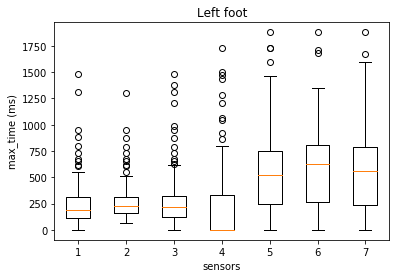

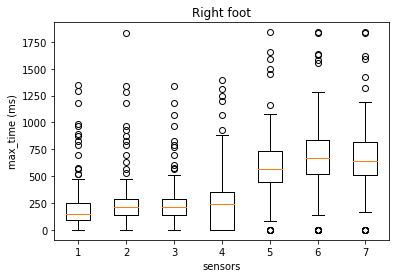

In [7]:
plt.boxplot([data1L["S0_max_time"],data1L["S1_max_time"],data1L["S2_max_time"],data1L["S3_max_time"],data1L["S4_max_time"],data1L["S5_max_time"],data1L["S6_max_time"]])
plt.ylabel('max_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_max_time"],data1R["S1_max_time"],data1R["S2_max_time"],data1R["S3_max_time"],data1R["S4_max_time"],data1R["S5_max_time"],data1R["S6_max_time"]])
plt.ylabel('max_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

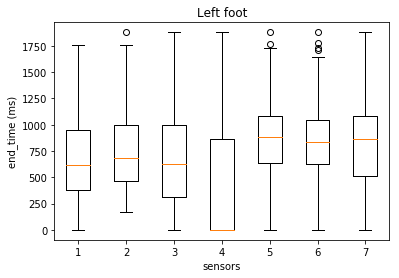

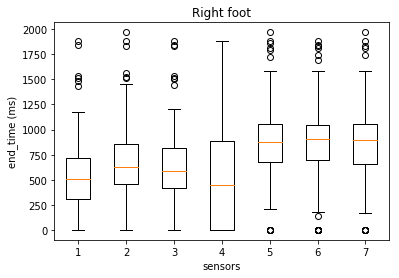

In [8]:
plt.boxplot([data1L["S0_end_time"],data1L["S1_end_time"],data1L["S2_end_time"],data1L["S3_end_time"],data1L["S4_end_time"],data1L["S5_end_time"],data1L["S6_end_time"]])
plt.ylabel('end_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_end_time"],data1R["S1_end_time"],data1R["S2_end_time"],data1R["S3_end_time"],data1R["S4_end_time"],data1R["S5_end_time"],data1R["S6_end_time"]])
plt.ylabel('end_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

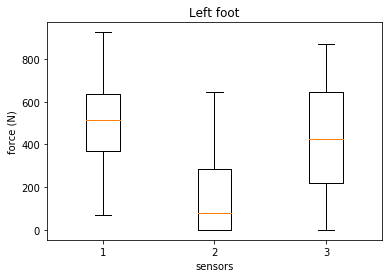

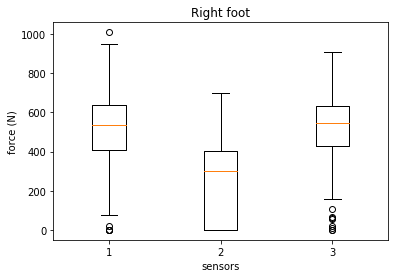

In [9]:
plt.boxplot([data1L["F1_force"],data1L["F2_force"],data1L["F3_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["F1_force"],data1R["F2_force"],data1R["F3_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

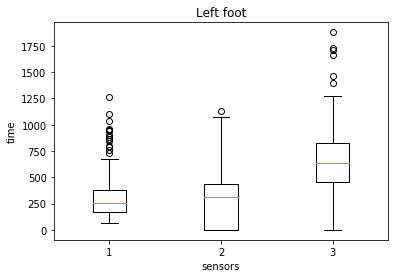

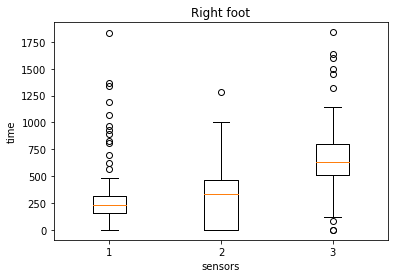

In [10]:
plt.boxplot([data1L["F1_time"],data1L["F2_time"],data1L["F3_time"]])
plt.ylabel('time')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["F1_time"],data1R["F2_time"],data1R["F3_time"]])
plt.ylabel('time')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

In [11]:
pd.DataFrame.describe(data1L)

,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,...,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Size,Insole_id,session
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.000000
mean,26.847222,51284.006944,976.527778,93.451389,25.902778,243.611111,659.513889,92.138889,29.027778,271.250000,...,506.152778,338.263889,173.243056,254.652778,421.625000,645.486111,0.0,41.888889,5148.472222,2.027778
std,15.542551,37575.480307,354.401533,49.935599,100.644171,226.566377,432.623045,35.911237,66.198678,176.595128,...,169.833333,237.805615,213.797409,274.312652,250.174481,362.301945,0.0,1.634895,1025.040268,0.801611
min,1.000000,0.000000,260.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,70.000000,...,72.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.0,40.000000,3867.000000,1.000000
25%,14.000000,24970.000000,720.000000,58.500000,0.000000,117.500000,380.000000,60.750000,0.000000,160.000000,...,369.250000,170.000000,0.000000,0.000000,221.000000,457.500000,0.0,40.000000,3867.000000,1.000000
50%,26.000000,44955.000000,960.000000,105.000000,0.000000,190.000000,620.000000,87.000000,10.000000,230.000000,...,515.500000,260.000000,79.000000,310.000000,424.000000,640.000000,0.0,42.000000,5258.000000,2.000000
75%,39.000000,67177.500000,1212.500000,130.000000,0.000000,310.000000,952.500000,114.500000,20.000000,310.000000,...,634.750000,380.000000,284.500000,435.000000,646.250000,822.500000,0.0,44.000000,6417.000000,3.000000
max,59.000000,157040.000000,1880.000000,204.000000,750.000000,1480.000000,1760.000000,184.000000,560.000000,1300.000000,...,925.000000,1260.000000,645.000000,1130.000000,870.000000,1880.000000,0.0,44.000000,6417.000000,3.000000


In [12]:
pd.DataFrame.describe(data1R)

,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,...,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Size,Insole_id,session
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0,154.000000,154.000000,154.000000
mean,29.519481,51992.428571,915.974026,98.772727,24.155844,213.376623,528.961039,79.545455,20.000000,269.350649,...,502.188312,291.688312,244.876623,284.610390,513.564935,655.194805,0.0,41.636364,5075.636364,2.097403
std,17.330400,35750.735935,333.438257,67.559465,98.017614,244.645190,379.077257,34.073947,43.386092,250.397528,...,200.363453,256.573207,226.887704,265.012352,180.702801,290.271950,0.0,1.591720,2706.779457,0.756406
min,1.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,40.000000,2244.000000,1.000000
25%,15.250000,25735.000000,730.000000,34.250000,0.000000,90.000000,312.500000,59.000000,0.000000,142.500000,...,409.750000,160.000000,0.000000,0.000000,430.000000,512.500000,0.0,40.000000,2244.000000,2.000000
50%,28.500000,47780.000000,930.000000,107.000000,0.000000,150.000000,510.000000,78.500000,10.000000,210.000000,...,536.500000,235.000000,302.500000,335.000000,544.000000,635.000000,0.0,42.000000,5820.000000,2.000000
75%,42.750000,69385.000000,1077.500000,155.500000,10.000000,250.000000,720.000000,103.000000,20.000000,290.000000,...,637.000000,317.500000,401.500000,460.000000,633.250000,800.000000,0.0,42.000000,5820.000000,3.000000
max,66.000000,156018.000000,1970.000000,220.000000,860.000000,1350.000000,1880.000000,210.000000,280.000000,1830.000000,...,1010.000000,1830.000000,700.000000,1280.000000,910.000000,1840.000000,0.0,44.000000,9004.000000,3.000000


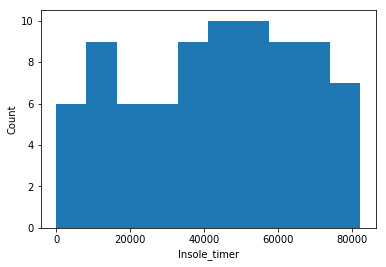

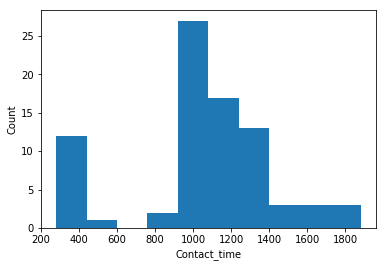

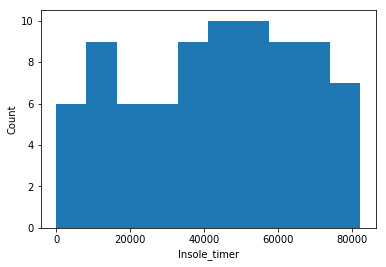

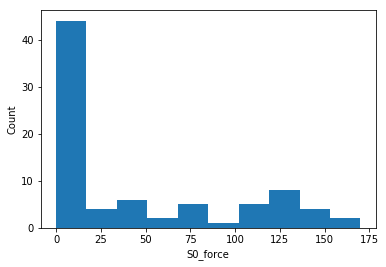

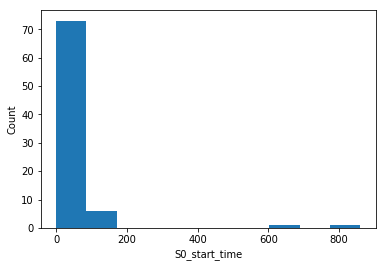

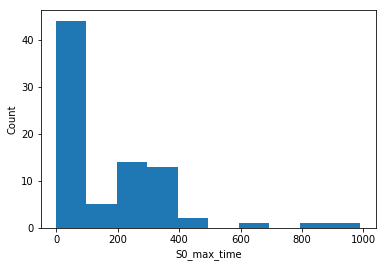

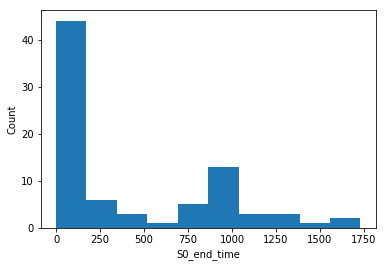

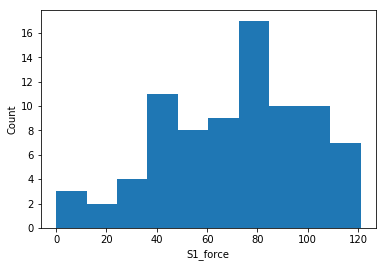

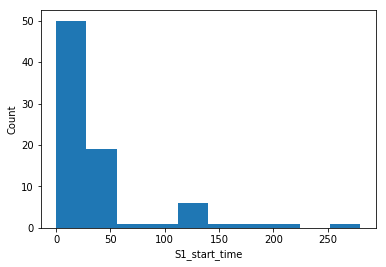

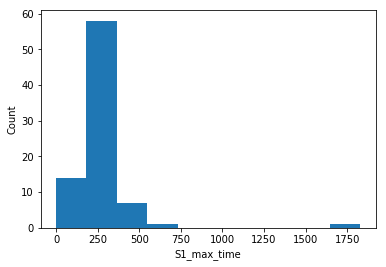

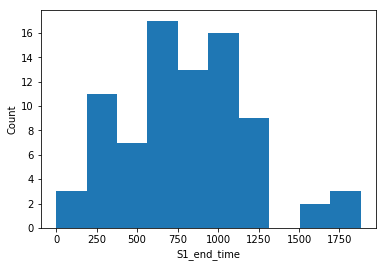

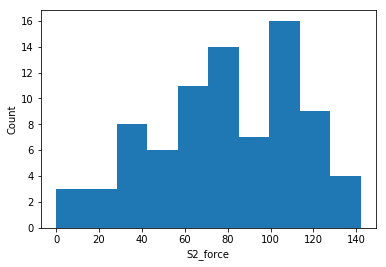

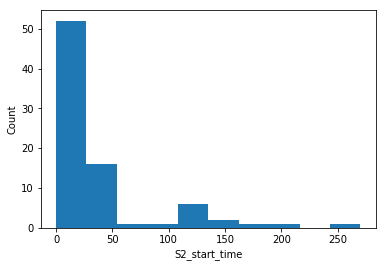

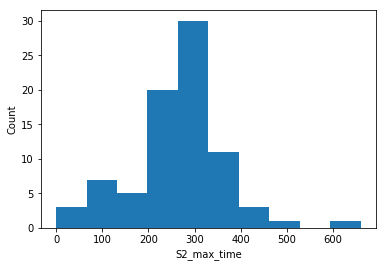

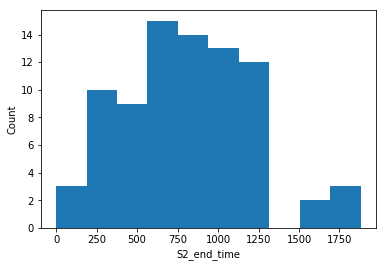

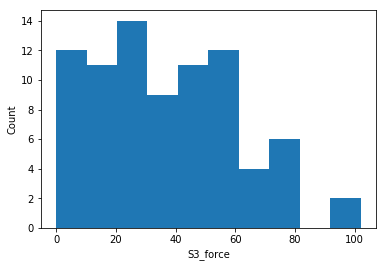

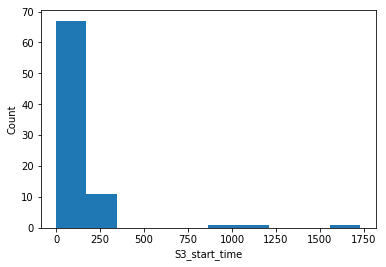

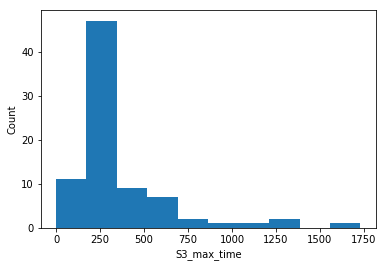

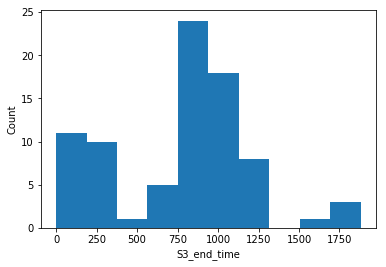

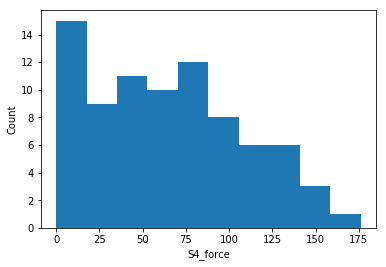

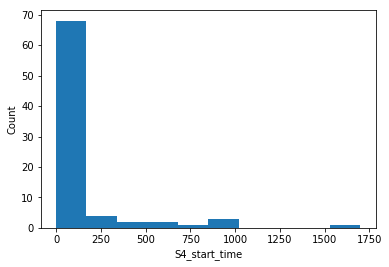

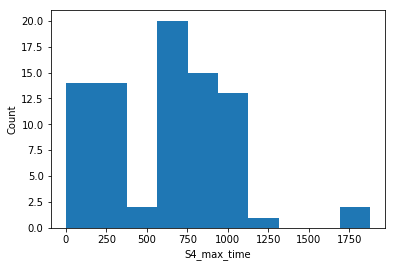

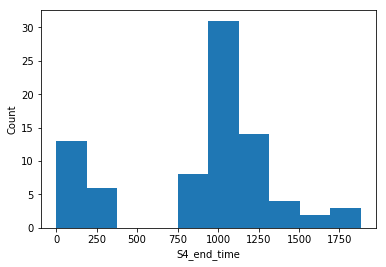

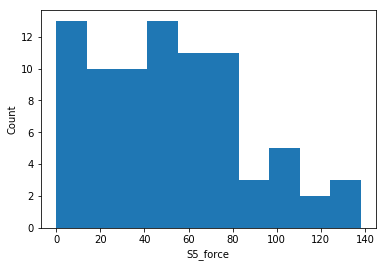

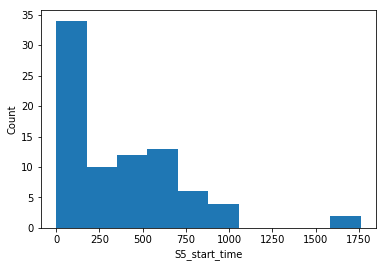

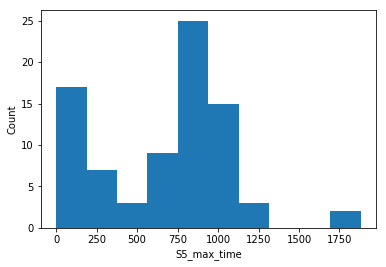

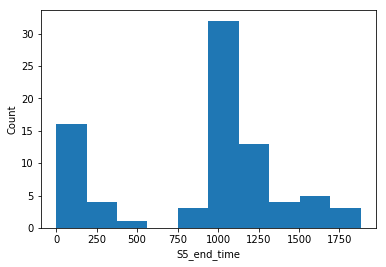

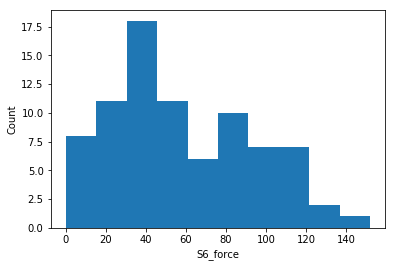

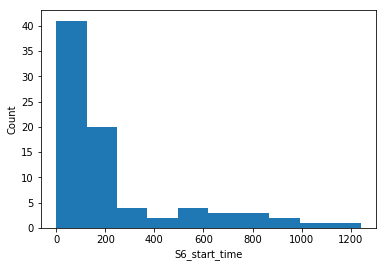

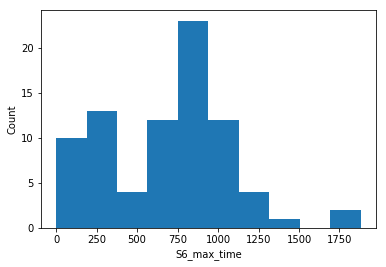

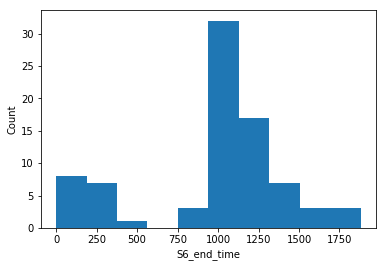

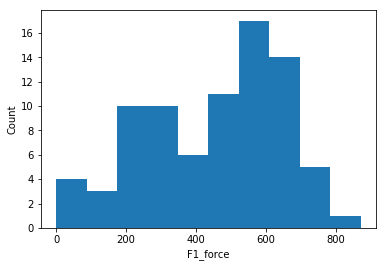

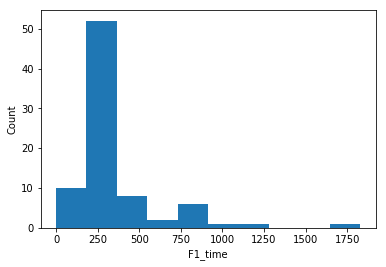

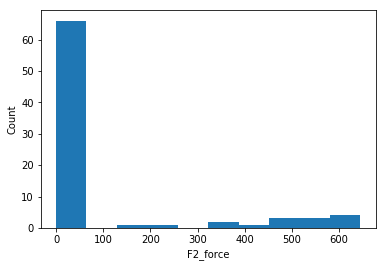

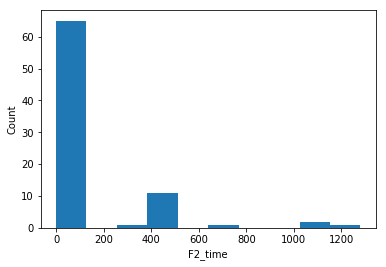

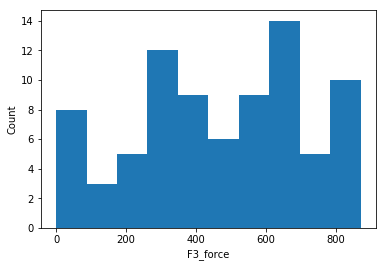

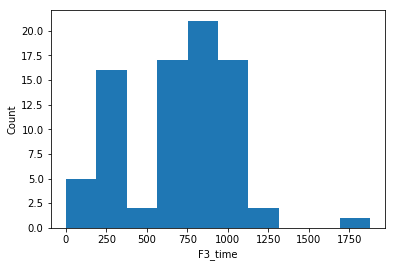

In [13]:
plt.hist(data1["Insole_timer"])
plt.xlabel('Insole_timer')
plt.ylabel('Count')
plt.show()

plt.hist(data1["Contact_time"])
plt.xlabel('Contact_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["Insole_timer"])
plt.xlabel('Insole_timer')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_force"])
plt.xlabel('S0_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_start_time"])
plt.xlabel('S0_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_max_time"])
plt.xlabel('S0_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_end_time"])
plt.xlabel('S0_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_force"])
plt.xlabel('S1_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_start_time"])
plt.xlabel('S1_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_max_time"])
plt.xlabel('S1_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_end_time"])
plt.xlabel('S1_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_force"])
plt.xlabel('S2_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_start_time"])
plt.xlabel('S2_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_max_time"])
plt.xlabel('S2_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_end_time"])
plt.xlabel('S2_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_force"])
plt.xlabel('S3_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_start_time"])
plt.xlabel('S3_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_max_time"])
plt.xlabel('S3_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_end_time"])
plt.xlabel('S3_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_force"])
plt.xlabel('S4_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_start_time"])
plt.xlabel('S4_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_max_time"])
plt.xlabel('S4_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_end_time"])
plt.xlabel('S4_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_force"])
plt.xlabel('S5_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_start_time"])
plt.xlabel('S5_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_max_time"])
plt.xlabel('S5_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_end_time"])
plt.xlabel('S5_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_force"])
plt.xlabel('S6_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_start_time"])
plt.xlabel('S6_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_max_time"])
plt.xlabel('S6_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_end_time"])
plt.xlabel('S6_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F1_force"])
plt.xlabel('F1_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F1_time"])
plt.xlabel('F1_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F2_force"])
plt.xlabel('F2_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F2_time"])
plt.xlabel('F2_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F3_force"])
plt.xlabel('F3_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F3_time"])
plt.xlabel('F3_time')
plt.ylabel('Count')
plt.show()


In [14]:

#"Insole_timer"
values_cols = ["Contact_time","S0_force","S0_start_time","S0_max_time","S0_end_time","S1_force",
               "S1_start_time","S1_max_time","S2_force","S2_start_time","S2_max_time","S2_end_time",
               "S3_force","S3_start_time","S3_max_time","S3_end_time","S4_force","S4_start_time",
               "S4_max_time","S4_end_time","S5_force","S5_start_time","S5_max_time","S5_end_time",
               "S6_force","S6_start_time","S6_max_time","S6_end_time","F1_force","F1_time","F2_force",
               "F2_time","F3_force","F3_time"]

force_cols = ["S0_force","S1_force","S2_force","S3_force","S4_force","S5_force","S6_force"]
startT_cols = ["S0_start_time","S1_start_time","S2_start_time","S3_start_time","S4_start_time","S5_start_time","S6_start_time"]
maxT_cols = ["S0_max_time","S1_max_time","S2_max_time","S3_max_time","S4_max_time","S5_max_time","S6_max_time"]
endT_cols = ["S0_end_time","S1_end_time","S2_end_time","S3_end_time","S4_end_time","S5_end_time","S6_end_time"]


In [15]:
values1L = data1L
values1R = data1R

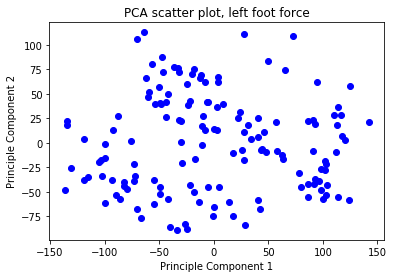

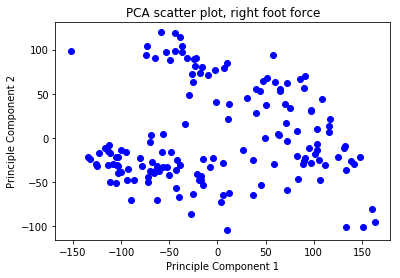

In [16]:
valuesL = data1L.loc[:,force_cols]
valuesR = data1R.loc[:,force_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.493
k = 3 :  0.423
k = 4 :  0.358
k = 5 :  0.366
k = 6 :  0.378
k = 7 :  0.399
k = 8 :  0.378
k = 9 :  0.321
k = 10 :  0.326

Best k= 2
Best silhouette score= 0.493


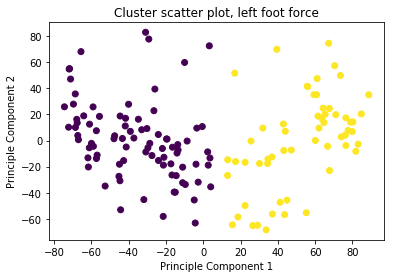

k = 2 :  0.561
k = 3 :  0.528
k = 4 :  0.409
k = 5 :  0.392
k = 6 :  0.373
k = 7 :  0.349
k = 8 :  0.289
k = 9 :  0.336
k = 10 :  0.277

Best k= 2
Best silhouette score= 0.561


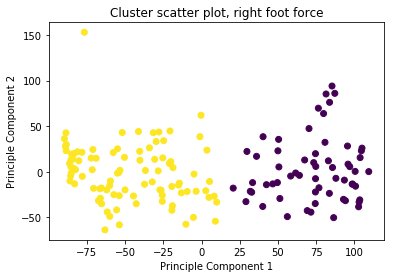

In [17]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot force")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

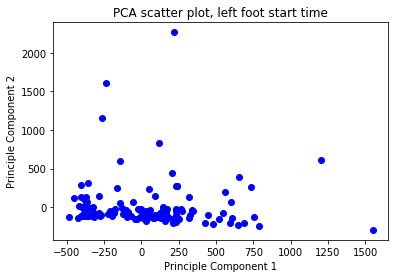

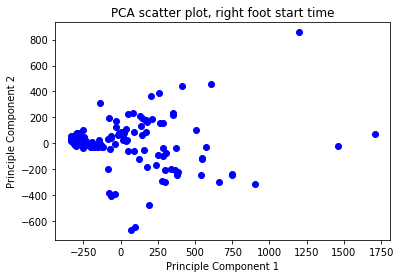

In [18]:
valuesL = data1L.loc[:,startT_cols]
valuesR = data1R.loc[:,startT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.367
k = 3 :  0.37
k = 4 :  0.423
k = 5 :  0.463
k = 6 :  0.466
k = 7 :  0.379
k = 8 :  0.459
k = 9 :  0.395
k = 10 :  0.408

Best k= 6
Best silhouette score= 0.466


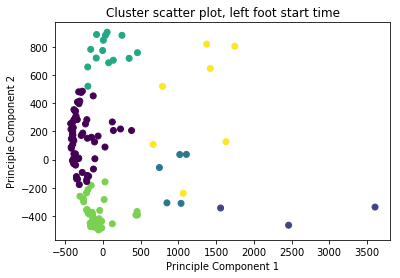

k = 2 :  0.524
k = 3 :  0.553
k = 4 :  0.475
k = 5 :  0.462
k = 6 :  0.477
k = 7 :  0.455
k = 8 :  0.475
k = 9 :  0.396
k = 10 :  0.45

Best k= 3
Best silhouette score= 0.553


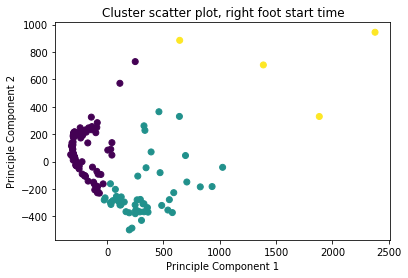

In [19]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot start time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

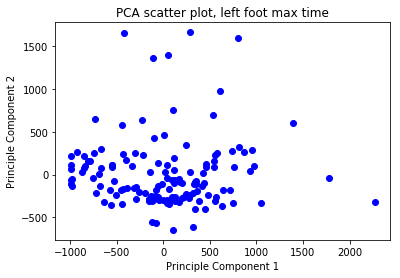

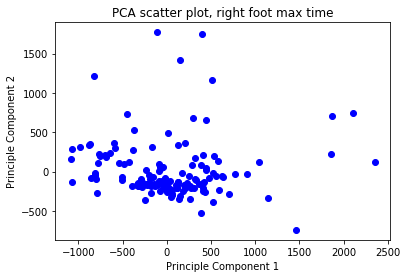

In [20]:
valuesL = data1L.loc[:,maxT_cols]
valuesR = data1R.loc[:,maxT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.37
k = 3 :  0.398
k = 4 :  0.351
k = 5 :  0.344
k = 6 :  0.311
k = 7 :  0.366
k = 8 :  0.314
k = 9 :  0.295
k = 10 :  0.309

Best k= 3
Best silhouette score= 0.398


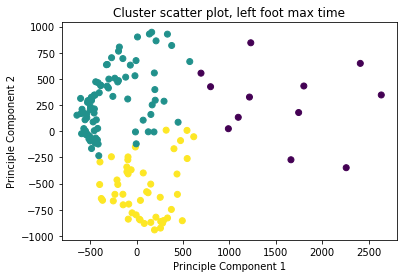

k = 2 :  0.416
k = 3 :  0.507
k = 4 :  0.483
k = 5 :  0.453
k = 6 :  0.474
k = 7 :  0.345
k = 8 :  0.37
k = 9 :  0.325
k = 10 :  0.353

Best k= 3
Best silhouette score= 0.507


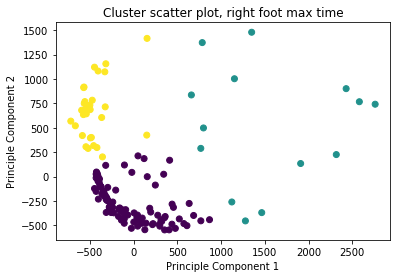

In [21]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot max time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

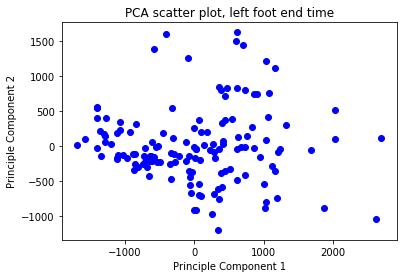

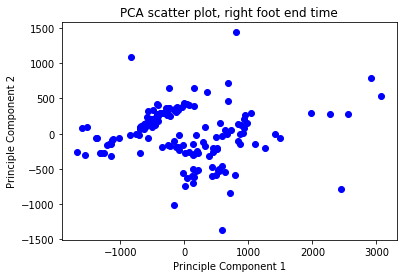

In [22]:
valuesL = data1L.loc[:,endT_cols]
valuesR = data1R.loc[:,endT_cols]

pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(valuesL)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(valuesR)

T1=pca1.transform(valuesL)
T2=pca2.transform(valuesR)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

k = 2 :  0.401
k = 3 :  0.339
k = 4 :  0.373
k = 5 :  0.36
k = 6 :  0.315
k = 7 :  0.328
k = 8 :  0.317
k = 9 :  0.348
k = 10 :  0.35

Best k= 2
Best silhouette score= 0.401


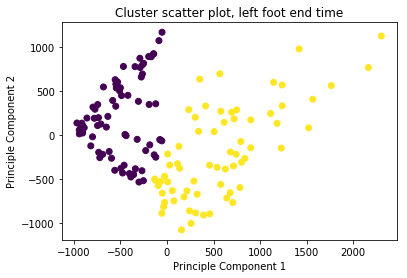

k = 2 :  0.448
k = 3 :  0.476
k = 4 :  0.489
k = 5 :  0.446
k = 6 :  0.429
k = 7 :  0.431
k = 8 :  0.413
k = 9 :  0.407
k = 10 :  0.409

Best k= 4
Best silhouette score= 0.489


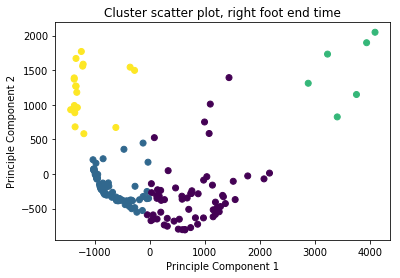

In [23]:
best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesL)

    T=clusters.transform(valuesL)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesL)

T=clusters.transform(valuesL)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, left foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

best_k=0
best_s=0

#Picking best k
for k in range(2,11): #from 2 to 10
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit(valuesR)

    T=clusters.transform(valuesR)

    #Dataframe from T
    Tdf=pd.DataFrame(T)
    labels=clusters.labels_
    s_score=silhouette_score(Tdf, labels)
    print("k =",k,": ",round(s_score, 3))

    if(s_score>best_s):
        best_s=s_score
        best_k=k
    
print("\nBest k=",best_k)
print("Best silhouette score=",round(best_s, 3))

###Rerunning kmeans with best k
kmeans=KMeans(n_clusters=best_k)
clusters=kmeans.fit(valuesR)

T=clusters.transform(valuesR)

#Dataframe from T
Tdf=pd.DataFrame(T)
y_pred=kmeans.fit_predict(Tdf.values)

#print(Tdf2)
#print(labels)
#print(y_pred)

#PCA
pca=PCA(n_components=2, svd_solver='full')
pca.fit(Tdf)
T=pca.transform(Tdf)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with prediction colors
plt.scatter(Tdf["c1"], Tdf["c2"], c=y_pred)
plt.title("Cluster scatter plot, right foot end time")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

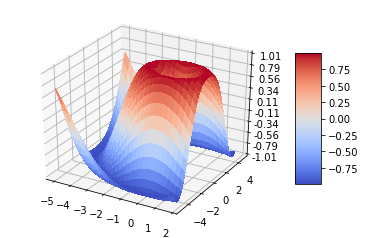

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#3d heatmap example

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 2, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.6, aspect=5)

plt.show()

